# Assignment: Naive Bayes and Logistic Classifiers
### Name: Saetbyeol Choi, Clark Blatter

## Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Given the function f(x) = x^2 + 6x
<br>1. Use derivative of f(x) to find the value of x that minimizes this function.***

> The derivative of f(x) = x^2 + 6x is:<br>
df(x)/dx = 2x + 6<br>
<br>Setting this derivative equal to zero and solving for x:<br>
<br>2x + 6 = 0<bk>
<br>2x = -6<bk>
<br>x = -3<br>
<br>So, the value of x that minimizes the function is -3.

***2. Use gradient descent to find the value of x that minimizes this function. Compare your answer with the previous part.***

In [2]:
def f(x):
    return x**2 + 6*x

def derivative_f(x):
    return 2*x + 6

def gradient_descent(x, learning_rate, num_iters):
    for i in range(num_iters):
        x = x - learning_rate * derivative_f(x)
    return x

# set initial value of x and learning rate, alpha
x = 0
learning_rate = 0.01
num_iters = 1000

# find minimum value of x
min_x = gradient_descent(x, learning_rate, num_iters)
print("The minimum value of x is:", min_x)

The minimum value of x is: -2.9999999949510996


> When using derivative, x = -3, whereas when using the gradient descen, x = -2.9999999949510996. Both give similar values for x, with the derivative giving the exact minimum value and gradient descent giving a close approximation.

# Problem 2

***1. Normalize the launch temperature using the expression x−µ/σ.***

In [3]:
df = pd.read_csv('C:/Users/sbyeo/Downloads/ORing.csv')

In [4]:
# Calculate the mean and standard deviation of the temperature data
temp_x = df['Temp']
temp_mu = df['Temp'].mean()
temp_sigma = df['Temp'].std()

In [5]:
# Normalize the temperature data using the formula (x - mean) / std
df['Temp_Normalized'] = (temp_x - temp_mu) / temp_sigma

# Check the result
print(df)

    Temp  Failure  Temp_Normalized
0     53        1        -2.293007
1     56        1        -1.886366
2     57        1        -1.750818
3     63        0        -0.937535
4     66        0        -0.530893
5     67        0        -0.395346
6     67        0        -0.395346
7     67        0        -0.395346
8     68        0        -0.259799
9     69        0        -0.124252
10    70        0         0.011296
11    70        1         0.011296
12    70        1         0.011296
13    70        1         0.011296
14    72        0         0.282390
15    73        0         0.417937
16    75        0         0.689032
17    75        1         0.689032
18    76        0         0.824579
19    76        0         0.824579
20    78        0         1.095673
21    79        0         1.231221
22    80        0         1.366768
23    81        0         1.502315


***2. Create a logistic regression model using the gradient decent technique to predict the probability of O-ring failure based on the launch temperature. Provide the equation for your model.***

In [6]:
# Convert data to arrays
x = df['Temp_Normalized'].values  
y = df['Failure'].values

# Add a column of ones to x for the bias term
x = np.column_stack((np.ones(len(x)), x)) 

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize theta with zeros
theta = np.zeros(x.shape[1])

# Define the maximum likelihood cost function
def maximum_likelihood(theta, x, y):
    pre_prob = sigmoid(np.dot(x, theta))
    return np.mean(y * np.log(pre_prob) + (1 - y) * np.log(1 - pre_prob))

# Define the gradient of the cost function
def gradient(theta, x, y):
    pre_prob = sigmoid(np.dot(x, theta))
    return np.dot(x.T, pre_prob - y) / len(y)

# Set the number of iterations and learning rate
iterations = 10000
alpha = 0.01 

# Perform gradient descent
for i in range(iterations):
    gradient_i = gradient(theta, x, y)
    theta = theta - alpha * gradient_i   

# Calculate the final prediction
pre_prob = sigmoid(np.dot(x, theta))

# Define decision boundary
def predict(x, theta, threshold = 0.5):
    return sigmoid(np.dot(x, theta)) >= threshold

In [7]:
# Print the model equation
print("w0=", theta[0], "w1=", theta[1])
print("Model Equation: f(x) = 1 / (1 + exp(",-theta[0],"+",-theta[1],"* x))")

w0= -1.102771442927212 w1= -1.263858424860378
Model Equation: f(x) = 1 / (1 + exp( 1.102771442927212 + 1.263858424860378 * x))


In [8]:
# Print the predicted probabilities
print("Predicted Probabilities:",pre_prob)

Predicted Probabilities: [0.8575716  0.7826757  0.75213195 0.52052349 0.3936972  0.35363251
 0.35363251 0.35363251 0.31552322 0.27974336 0.24655936 0.24655936
 0.24655936 0.24655936 0.18851742 0.16369547 0.12200166 0.12200166
 0.10480664 0.10480664 0.07673576 0.06544502 0.05571531 0.04735882]


***3. Provide a plot of the original data along with your logistic model.***

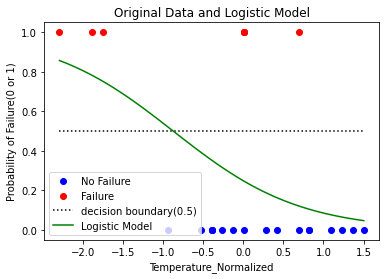

In [9]:
# Plot the original data and the logistic model
#plt.scatter(df['Temp_Normalized'], df['Failure'], c=df['Failure'], cmap='rainbow')


plt.scatter(df['Temp_Normalized'][df['Failure'] == 0], np.zeros(len(df[df['Failure'] == 0])), marker='o', color='blue', label='No Failure')
plt.scatter(df['Temp_Normalized'][df['Failure'] == 1], np.ones(len(df[df['Failure'] == 1])), marker='o', color='red', label='Failure')
x_values = np.linspace(df['Temp_Normalized'].min(), df['Temp_Normalized'].max(), 100)
y_values = sigmoid(theta[0] + theta[1] * x_values)

boundary = np.zeros(len(x_values)) + 0.5
plt.plot(x_values, boundary, ':', color='black', label='decision boundary(0.5)')
plt.plot(x_values, y_values, label='Logistic Model', c='green')

plt.xlabel('Temperature_Normalized')
plt.ylabel('Probability of Failure(0 or 1)')
plt.title('Original Data and Logistic Model')
plt.legend()
plt.show()

***4. The actual temperature at the Challenger launch was 31 degrees Fahrenheit. According to your model what was the probability of O-ring failure on the Challenger launch? Could the engineers have used your model to provide a convincing argument to NASA? Elaborate.***

In [10]:
# Normalize the Challenger launch temperature
temp = 31
temp_normalized = (temp - temp_mu) / temp_sigma

#temp_normalized = (temp - data['Temp_Normalized'].mean()) / data['Temp_Normalized'].std()

# Calculate the logistic regression prediction
pred = 1 / (1 + np.exp(- (theta[0] + theta[1] * temp_normalized)))

# Print the result
print("Probability of O-ring failure at 31 degrees Fahrenheit:", pred)
print("Probability of O-ring failure at temperature {} degrees Fahrenheit: {:.2f}%".format(temp, pred * 100))

Probability of O-ring failure at 31 degrees Fahrenheit: 0.9961817616649195
Probability of O-ring failure at temperature 31 degrees Fahrenheit: 99.62%


> The engineers could have used a logistic regression model to analyze the risk of the O-ring failing, but they also had to consider other information and do a complete risk analysis before providing a convincing argument to NASA. The model was limited and they needed to be  aware of that.